In [1]:
from sklearn.mixture import GaussianMixture as GMM
import fitz
import numpy as np
import pandas as pd
from tqdm import tqdm

import io
from PIL import Image, ImageDraw, ImageFont, ImageColor

import matplotlib.pyplot as plt
import seaborn as sns; 

In [2]:
vol1_path = '../input/NOUVELLE FLORE DU LIBAN ET DE LA SYRIE 1.pdf'
vol2_path = '../input/NOUVELLE FLORE DU LIBAN ET DE LA SYRIE 2.pdf'
vol3_path = '../input/NOUVELLE FLORE DU LIBAN ET DE LA SYRIE 3.pdf'

vol1_doc = fitz.open(vol1_path)
vol2_doc = fitz.open(vol2_path)
vol3_doc = fitz.open(vol3_path)

vol1_pages = [vol1_doc[i] for i in range(vol1_doc.page_count)]
vol2_pages = [vol2_doc[i] for i in range(vol2_doc.page_count)]
vol3_pages = [vol3_doc[i] for i in range(vol3_doc.page_count)]

In [3]:
vol1_char_df = pd.read_pickle("../input/char_df/vol1_df.pkl")
vol2_char_df = pd.read_pickle("../input/char_df/vol2_df.pkl")
vol3_char_df = pd.read_pickle("../input/char_df/vol3_df.pkl")

vol1_index = list(range(616, 638+1)) #inclusive
vol2_index = list(range(703, 724+1))
vol3_index = list(range(555, 582+1))

In [4]:
TARGET_DPI = 300
mat = fitz.Matrix(TARGET_DPI/ 72, TARGET_DPI/ 72)

In [5]:
vol1_char_df

,vol_num,page_num,block_num,block_num_absolute,block_bbox,line_num,line_wmode,line_dir,line_bbox,span_num,...,span_ascender,span_descender,span_origin,span_bbox,word_num,word,char_num,char,char_origin,char_bbox
0,1,0,0,0,"(110.87999725341797, 127.92001342773438, 344.0...",0,0,"(1.0, 0.0)","(110.87999725341797, 127.92001342773438, 344.0...",0,...,0.75,-0.25,"(110.87999725341797, 136.92001342773438)","(110.87999725341797, 127.92001342773438, 344.0...",0,AUTRES,0,A,"(110.87999725341797, 136.92001342773438)","(110.87999725341797, 127.92001342773438, 119.4..."
1,1,0,0,0,"(110.87999725341797, 127.92001342773438, 344.0...",0,0,"(1.0, 0.0)","(110.87999725341797, 127.92001342773438, 344.0...",0,...,0.75,-0.25,"(110.87999725341797, 136.92001342773438)","(110.87999725341797, 127.92001342773438, 344.0...",0,AUTRES,1,U,"(119.42528533935547, 136.92001342773438)","(119.42528533935547, 127.92001342773438, 128.0..."
2,1,0,0,0,"(110.87999725341797, 127.92001342773438, 344.0...",0,0,"(1.0, 0.0)","(110.87999725341797, 127.92001342773438, 344.0...",0,...,0.75,-0.25,"(110.87999725341797, 136.92001342773438)","(110.87999725341797, 127.92001342773438, 344.0...",0,AUTRES,2,T,"(127.97057342529297, 136.92001342773438)","(127.97057342529297, 127.92001342773438, 135.2..."
3,1,0,0,0,"(110.87999725341797, 127.92001342773438, 344.0...",0,0,"(1.0, 0.0)","(110.87999725341797, 127.92001342773438, 344.0...",0,...,0.75,-0.25,"(110.87999725341797, 136.92001342773438)","(110.87999725341797, 127.92001342773438, 344.0...",0,AUTRES,3,R,"(135.19717407226562, 136.92001342773438)","(135.19717407226562, 127.92001342773438, 143.1..."
4,1,0,0,0,"(110.87999725341797, 127.92001342773438, 344.0...",0,0,"(1.0, 0.0)","(110.87999725341797, 127.92001342773438, 344.0...",0,...,0.75,-0.25,"(110.87999725341797, 136.92001342773438)","(110.87999725341797, 127.92001342773438, 344.0...",0,AUTRES,4,E,"(143.0890655517578, 136.92001342773438)","(143.0890655517578, 127.92001342773438, 150.34..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764639,1,641,5,7,"(134.63999938964844, 294.22998046875, 245.3221...",0,0,"(1.0, 0.0)","(134.63999938964844, 294.22998046875, 245.3221...",0,...,0.75,-0.25,"(134.63999938964844, 299.47998046875)","(134.63999938964844, 294.22998046875, 245.3221...",3,SOIXANTE-SIX,7,E,"(227.60250854492188, 299.47998046875)","(227.60250854492188, 294.22998046875, 232.2247..."
1764640,1,641,5,7,"(134.63999938964844, 294.22998046875, 245.3221...",0,0,"(1.0, 0.0)","(134.63999938964844, 294.22998046875, 245.3221...",0,...,0.75,-0.25,"(134.63999938964844, 299.47998046875)","(134.63999938964844, 294.22998046875, 245.3221...",3,SOIXANTE-SIX,8,-,"(232.03839111328125, 299.47998046875)","(232.03839111328125, 294.22998046875, 234.3461..."
1764641,1,641,5,7,"(134.63999938964844, 294.22998046875, 245.3221...",0,0,"(1.0, 0.0)","(134.63999938964844, 294.22998046875, 245.3221...",0,...,0.75,-0.25,"(134.63999938964844, 299.47998046875)","(134.63999938964844, 294.22998046875, 245.3221...",3,SOIXANTE-SIX,9,S,"(234.15965270996094, 299.47998046875)","(234.15965270996094, 294.22998046875, 238.0137..."
1764642,1,641,5,7,"(134.63999938964844, 294.22998046875, 245.3221...",0,0,"(1.0, 0.0)","(134.63999938964844, 294.22998046875, 245.3221...",0,...,0.75,-0.25,"(134.63999938964844, 299.47998046875)","(134.63999938964844, 294.22998046875, 245.3221...",3,SOIXANTE-SIX,10,I,"(237.82630920410156, 299.47998046875)","(237.82630920410156, 294.22998046875, 240.5231..."


In [6]:
vol1_char_df.columns

Index(['vol_num', 'page_num', 'block_num', 'block_num_absolute', 'block_bbox',
       'line_num', 'line_wmode', 'line_dir', 'line_bbox', 'span_num',
       'span_size', 'span_flags', 'span_font', 'span_color', 'span_ascender',
       'span_descender', 'span_origin', 'span_bbox', 'word_num', 'word',
       'char_num', 'char', 'char_origin', 'char_bbox'],
      dtype='object')

In [7]:
page_num = vol1_index[-7]
practice_df = vol1_char_df[(vol1_char_df['page_num'] == page_num) & (vol1_char_df['word_num'] == 0) & (vol1_char_df['char_num'] == 0) & (vol1_char_df['word'].str.isalpha())].copy()
practice_df["span_bbox_x0"] = practice_df['span_origin'].apply(lambda x : x[0])
practice_df["span_bbox_y0"] = practice_df['span_bbox'].apply(lambda x : x[1])

center_x0 = 0.5*(vol1_char_df['span_origin'].apply(lambda x : x[0]).max() + 
            vol1_char_df['span_origin'].apply(lambda x : x[0]).min())



# def get_col_num(x0, center_x0 = center_x0):
#     return int(x0 >= center_x0)

# practice_df["col_num"] = practice_df["span_orig_x0"].apply(get_col_num)
practice_df["ones"] = np.ones(practice_df.shape[0])

In [8]:
practice_df

,vol_num,page_num,block_num,block_num_absolute,block_bbox,line_num,line_wmode,line_dir,line_bbox,span_num,...,span_bbox,word_num,word,char_num,char,char_origin,char_bbox,span_bbox_x0,span_bbox_y0,ones
1749879,1,632,0,0,"(173.0399932861328, 24.091323852539062, 406.52...",0,0,"(1.0, 0.0)","(173.0399932861328, 25.84002685546875, 251.396...",0,...,"(173.0399932861328, 25.84002685546875, 251.396...",0,NOUVELLE,0,N,"(173.0399932861328, 31.84002685546875)","(173.0399932861328, 25.84002685546875, 178.759...",173.039993,25.840027,1.0
1749895,1,632,1,1,"(31.920000076293945, 48.8800048828125, 82.9526...",0,0,"(1.0, 0.0)","(31.920000076293945, 48.8800048828125, 81.5830...",0,...,"(31.920000076293945, 48.8800048828125, 61.3982...",0,pectinata,0,p,"(31.920000076293945, 54.8800048828125)","(31.920000076293945, 48.8800048828125, 35.8800...",31.920000,48.880005,1.0
1749908,1,632,1,1,"(31.920000076293945, 48.8800048828125, 82.9526...",1,0,"(1.0, 0.0)","(33.119998931884766, 57.489990234375, 82.95264...",0,...,"(33.119998931884766, 57.489990234375, 82.95264...",0,persica,0,p,"(33.119998931884766, 64.239990234375)","(33.119998931884766, 57.489990234375, 37.57499...",33.119999,57.489990,1.0
1749920,1,632,2,3,"(32.15999984741211, 67.5999755859375, 78.39270...",0,0,"(1.0, 0.0)","(32.15999984741211, 67.5999755859375, 64.16799...",0,...,"(32.15999984741211, 67.5999755859375, 51.52439...",0,pilosa,0,p,"(32.15999984741211, 73.5999755859375)","(32.15999984741211, 67.5999755859375, 36.11999...",32.160000,67.599976,1.0
1749928,1,632,2,3,"(32.15999984741211, 67.5999755859375, 78.39270...",1,0,"(1.0, 0.0)","(33.119998931884766, 76.21002197265625, 78.392...",0,...,"(33.119998931884766, 76.21002197265625, 78.392...",0,pratensis,0,p,"(33.119998931884766, 82.96002197265625)","(33.119998931884766, 76.21002197265625, 37.574...",33.119999,76.210022,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751724,1,632,96,145,"(239.27999877929688, 559.3300170898438, 349.11...",0,0,"(1.0, 0.0)","(239.27999877929688, 559.3300170898438, 349.11...",0,...,"(239.27999877929688, 559.3300170898438, 349.11...",0,convoluta,0,c,"(239.27999877929688, 566.0800170898438)","(239.27999877929688, 559.3300170898438, 243.23...",239.279999,559.330017,1.0
1751748,1,632,97,147,"(239.0399932861328, 569.6500244140625, 305.670...",0,0,"(1.0, 0.0)","(239.0399932861328, 569.6500244140625, 305.670...",0,...,"(239.0399932861328, 569.6500244140625, 283.132...",0,distans,0,d,"(239.0399932861328, 576.4000244140625)","(239.0399932861328, 569.6500244140625, 243.494...",239.039993,569.650024,1.0
1751943,1,632,125,182,"(239.27999877929688, 578.77001953125, 405.5025...",0,0,"(1.0, 0.0)","(239.27999877929688, 578.77001953125, 367.3292...",0,...,"(239.27999877929688, 578.77001953125, 302.8103...",0,rupestris,0,r,"(239.27999877929688, 585.52001953125)","(239.27999877929688, 578.77001953125, 242.2471...",239.279999,578.770020,1.0
1751975,1,632,126,183,"(225.83999633789062, 588.8499755859375, 266.76...",0,0,"(1.0, 0.0)","(225.83999633789062, 588.8499755859375, 266.76...",0,...,"(225.83999633789062, 588.8499755859375, 266.76...",0,Puschkinia,0,P,"(225.83999633789062, 595.5999755859375)","(225.83999633789062, 588.8499755859375, 230.79...",225.839996,588.849976,1.0


In [9]:
X = practice_df[["span_bbox_x0","ones"]]

### March 9th 

In [ ]:
practice_df = vol1_char_df[(vol1_char_df['page_num'] == page_num) & (vol1_char_df['word_num'] == 0) & (vol1_char_df['char_num'] == 0) & (vol1_char_df['word'].str.isalpha())].copy()


### March 9th end

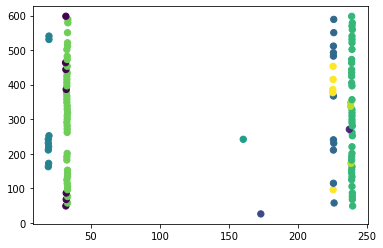

In [168]:
gmm = GMM(n_components=10, covariance_type='full').fit(X)
labels = gmm.predict(X)
plt.scatter(X["span_bbox_x0"], practice_df["span_bbox_y0"], c=labels, s=40, cmap='viridis')

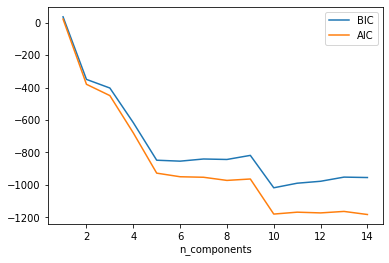

In [166]:
n_components = np.arange(1, 15)
models = [GMM(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

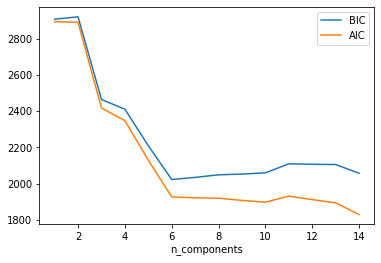

In [169]:
XY = practice_df[["span_bbox_x0","span_bbox_y0"]]
X = practice_df[["span_bbox_x0","ones"]]
n_components = np.arange(1, 15)
models = [GMM(n, covariance_type='full', random_state=0).fit(XY)
          for n in n_components]

plt.plot(n_components, [m.bic(XY) for m in models], label='BIC')
plt.plot(n_components, [m.aic(XY) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

ideal_n = np.array([m.bic(XY) for m in models]).argmin()+1

gmm = GMM(ideal_n, covariance_type='full').fit(X)
labels = gmm.predict(X)
practice_df['x0_labels'] = labels

In [170]:
practice_df

,vol_num,page_num,block_num,block_num_absolute,block_bbox,line_num,line_wmode,line_dir,line_bbox,span_num,...,word_num,word,char_num,char,char_origin,char_bbox,span_bbox_x0,span_bbox_y0,ones,x0_labels
1749879,1,632,0,0,"(173.0399932861328, 24.091323852539062, 406.52...",0,0,"(1.0, 0.0)","(173.0399932861328, 25.84002685546875, 251.396...",0,...,0,NOUVELLE,0,N,"(173.0399932861328, 31.84002685546875)","(173.0399932861328, 25.84002685546875, 178.759...",173.039993,25.840027,1.0,2
1749895,1,632,1,1,"(31.920000076293945, 48.8800048828125, 82.9526...",0,0,"(1.0, 0.0)","(31.920000076293945, 48.8800048828125, 81.5830...",0,...,0,pectinata,0,p,"(31.920000076293945, 54.8800048828125)","(31.920000076293945, 48.8800048828125, 35.8800...",31.920000,48.880005,1.0,1
1749908,1,632,1,1,"(31.920000076293945, 48.8800048828125, 82.9526...",1,0,"(1.0, 0.0)","(33.119998931884766, 57.489990234375, 82.95264...",0,...,0,persica,0,p,"(33.119998931884766, 64.239990234375)","(33.119998931884766, 57.489990234375, 37.57499...",33.119999,57.489990,1.0,1
1749920,1,632,2,3,"(32.15999984741211, 67.5999755859375, 78.39270...",0,0,"(1.0, 0.0)","(32.15999984741211, 67.5999755859375, 64.16799...",0,...,0,pilosa,0,p,"(32.15999984741211, 73.5999755859375)","(32.15999984741211, 67.5999755859375, 36.11999...",32.160000,67.599976,1.0,1
1749928,1,632,2,3,"(32.15999984741211, 67.5999755859375, 78.39270...",1,0,"(1.0, 0.0)","(33.119998931884766, 76.21002197265625, 78.392...",0,...,0,pratensis,0,p,"(33.119998931884766, 82.96002197265625)","(33.119998931884766, 76.21002197265625, 37.574...",33.119999,76.210022,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751724,1,632,96,145,"(239.27999877929688, 559.3300170898438, 349.11...",0,0,"(1.0, 0.0)","(239.27999877929688, 559.3300170898438, 349.11...",0,...,0,convoluta,0,c,"(239.27999877929688, 566.0800170898438)","(239.27999877929688, 559.3300170898438, 243.23...",239.279999,559.330017,1.0,0
1751748,1,632,97,147,"(239.0399932861328, 569.6500244140625, 305.670...",0,0,"(1.0, 0.0)","(239.0399932861328, 569.6500244140625, 305.670...",0,...,0,distans,0,d,"(239.0399932861328, 576.4000244140625)","(239.0399932861328, 569.6500244140625, 243.494...",239.039993,569.650024,1.0,0
1751943,1,632,125,182,"(239.27999877929688, 578.77001953125, 405.5025...",0,0,"(1.0, 0.0)","(239.27999877929688, 578.77001953125, 367.3292...",0,...,0,rupestris,0,r,"(239.27999877929688, 585.52001953125)","(239.27999877929688, 578.77001953125, 242.2471...",239.279999,578.770020,1.0,0
1751975,1,632,126,183,"(225.83999633789062, 588.8499755859375, 266.76...",0,0,"(1.0, 0.0)","(225.83999633789062, 588.8499755859375, 266.76...",0,...,0,Puschkinia,0,P,"(225.83999633789062, 595.5999755859375)","(225.83999633789062, 588.8499755859375, 230.79...",225.839996,588.849976,1.0,3


In [171]:
practice_df.groupby('x0_labels')["span_bbox_x0"].mean()

x0_labels
0    238.914284
1     32.749565
2    173.039993
3    225.570002
4     19.413334
5    160.320007
Name: span_bbox_x0, dtype: float64

In [182]:
practice_df[(practice_df["span_bbox_x0"] > 100) & (practice_df["span_bbox_x0"] < 169)]

,vol_num,page_num,block_num,block_num_absolute,block_bbox,line_num,line_wmode,line_dir,line_bbox,span_num,...,word_num,word,char_num,char,char_origin,char_bbox,span_bbox_x0,span_bbox_y0,ones,x0_labels
1750885,1,632,43,74,"(160.32000732421875, 241.80999755859375, 200.0...",0,0,"(1.0, 0.0)","(160.32000732421875, 241.80999755859375, 200.0...",0,...,0,Link,0,L,"(160.32000732421875, 248.55999755859375)","(160.32000732421875, 241.80999755859375, 165.7...",160.320007,241.809998,1.0,5


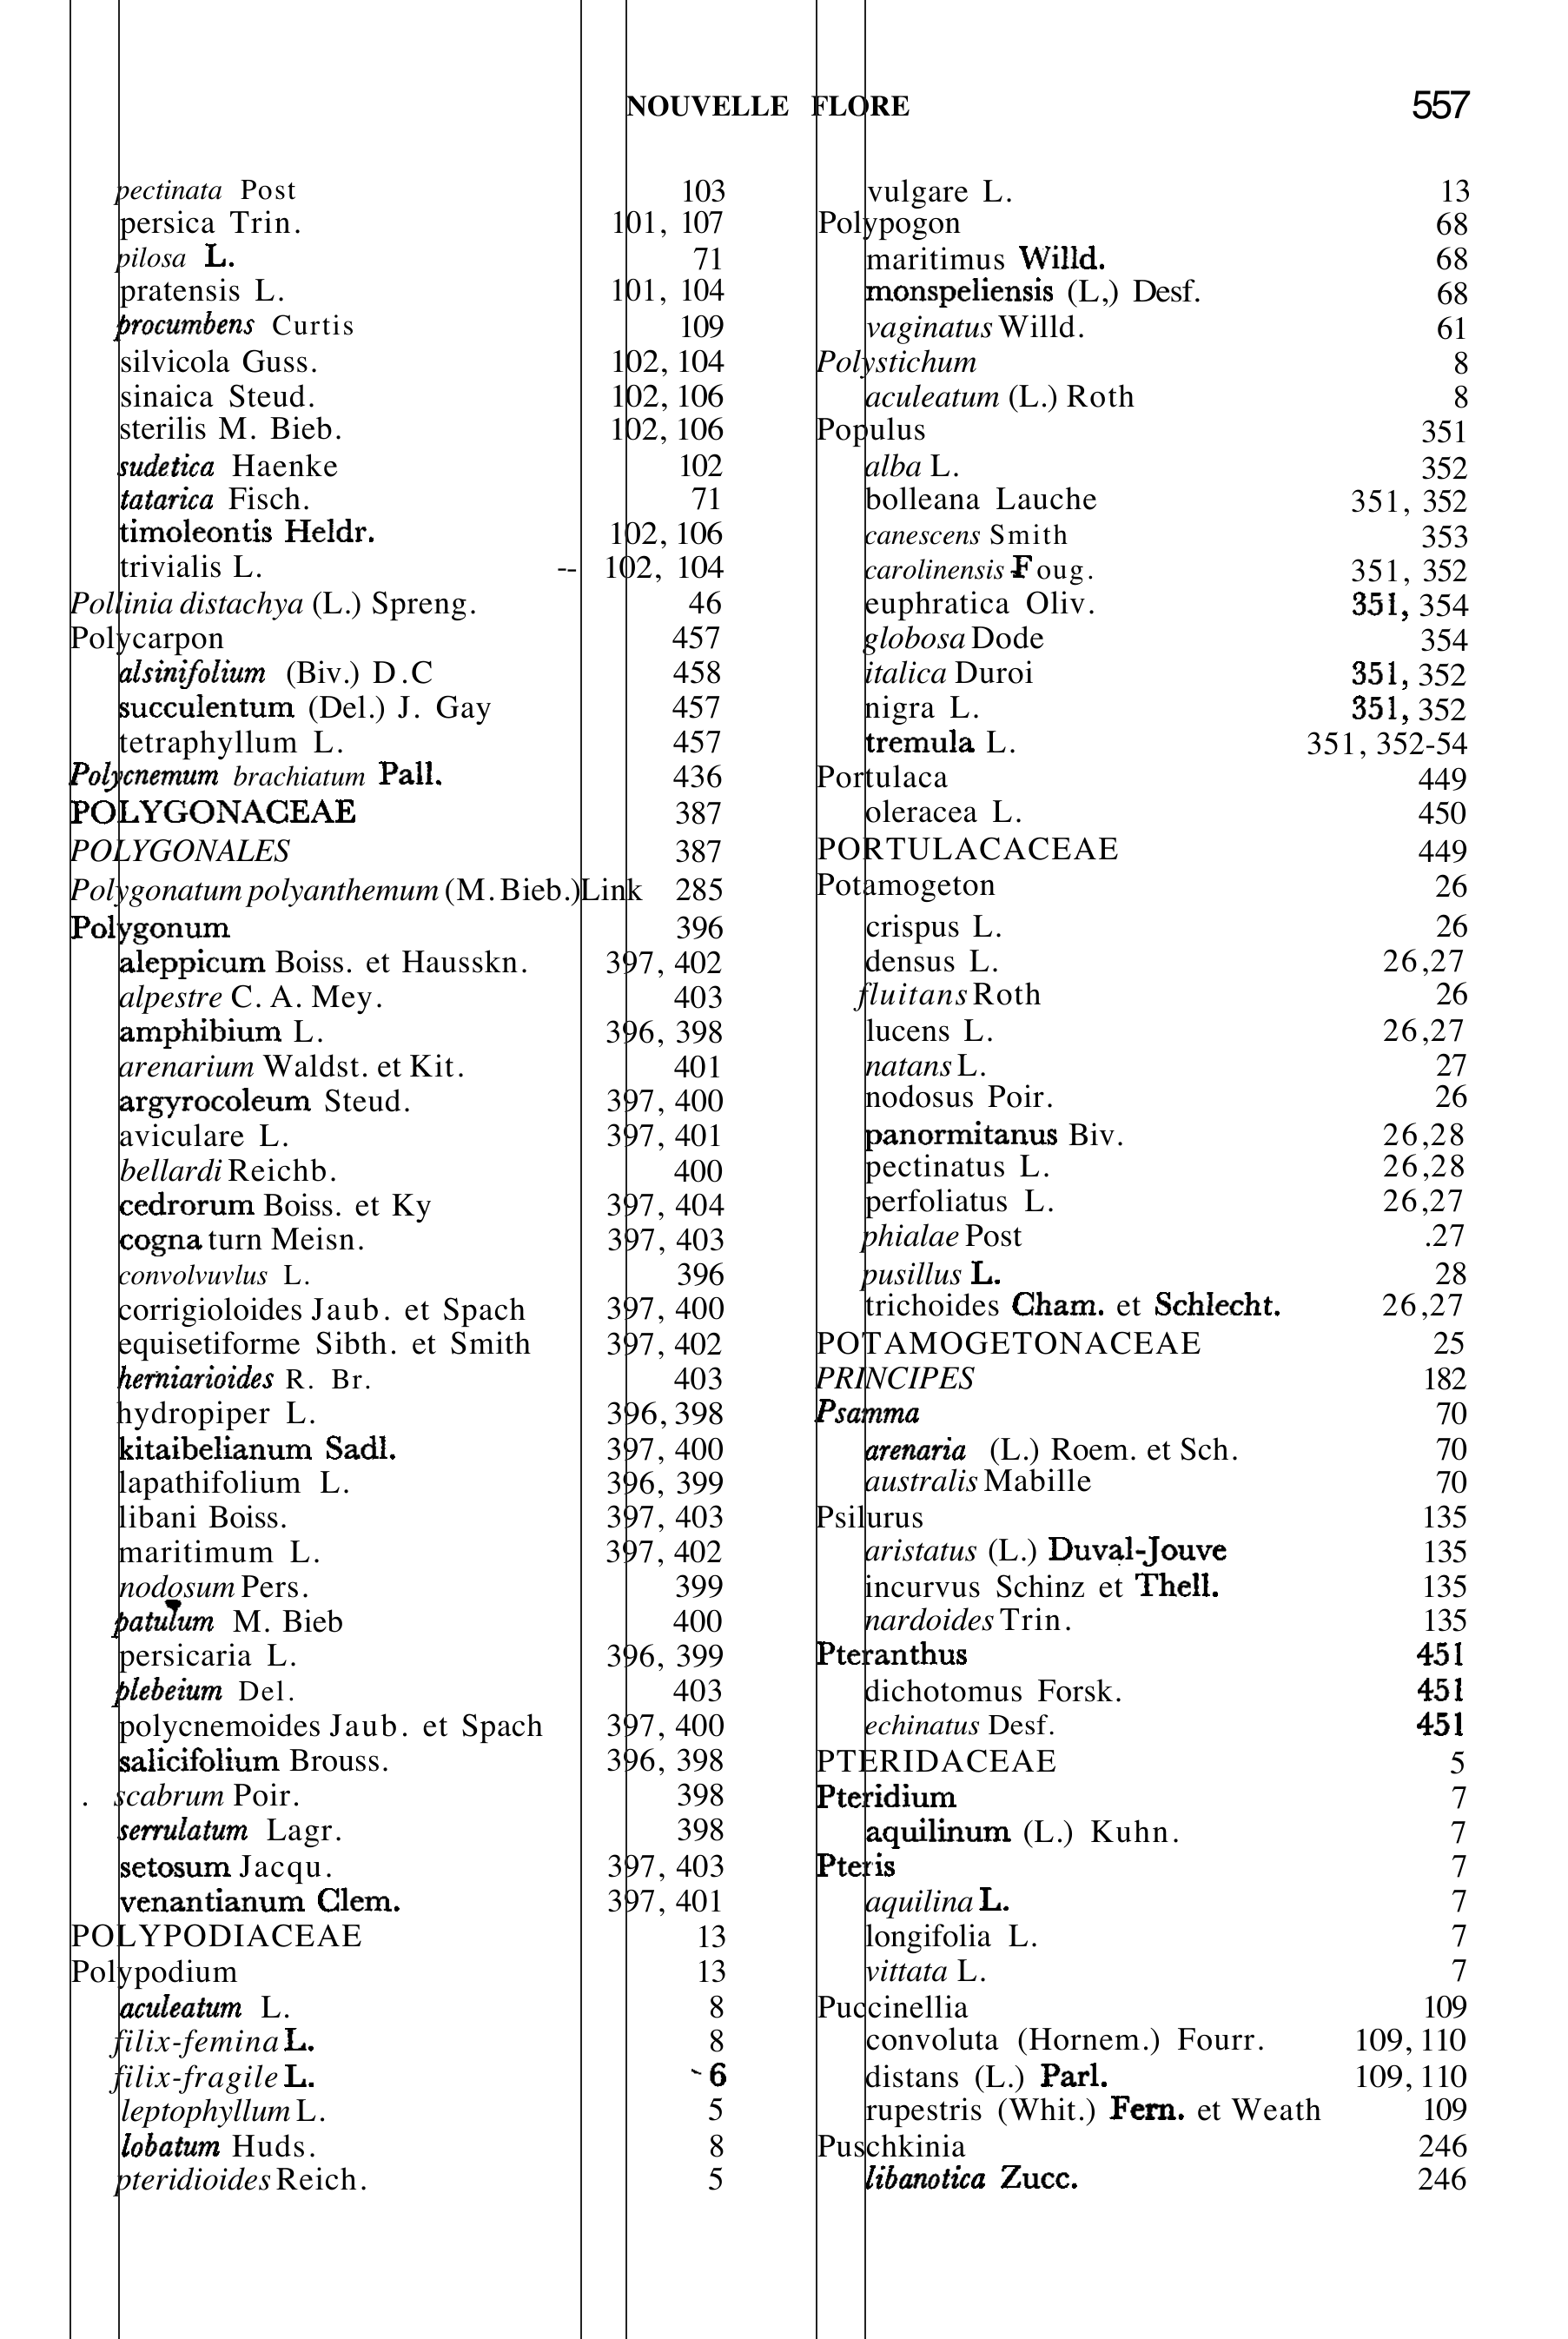

In [177]:
pix_map = vol1_doc.get_page_pixmap(page_num,matrix=mat)
image = Image.open(io.BytesIO(pix_map.tobytes()))
draw = ImageDraw.Draw(image)

# # testing looking at first word, of first span, having upper case character to 
for x0 in practice_df.groupby('x0_labels')["span_bbox_x0"].mean():
    x0_dpi = x0*TARGET_DPI/ 72 
    draw.rectangle((x0_dpi, 0, x0_dpi+1, 10000), fill=None, outline=ImageColor.getrgb("#222222"))
image_list.append(image)

In [ ]:
image_list.append(image)
image_list[0].save('../output/local/index_gmm/vol1.pdf' ,save_all=True, append_images=image_list[1:])

### putting it together under one function

In [206]:
page_num = vol1_index[-7]

def gmm_setup(vol_df, page_num):
    copy_df = vol_df[(vol_df['page_num'] == page_num) & 
                         (vol_df['word_num'] == 0) & 
                         (vol_df['char_num'] == 0) & (vol_df['word'].str.isalpha())
                        ].copy()
    copy_df["span_bbox_x0"] = copy_df['span_bbox'].apply(lambda x : x[0])
    copy_df["span_bbox_y0"] = copy_df['span_bbox'].apply(lambda x : x[1])
    copy_df["ones"] = np.ones(copy_df.shape[0])

    XY = copy_df[["span_bbox_x0","span_bbox_y0"]]
    X = copy_df[["span_bbox_x0","ones"]]

    n_components = np.arange(1, 15) #logically we shouldn't have more than 15 this many including some errors
    models_XY = [GMM(n, covariance_type='full', random_state=0).fit(XY) for n in n_components]
    ideal_XY_n = np.array([m.bic(XY) for m in models_XY]).argmin()+1 #BIC: Bayesian information criterion
    print("best n considering X and Y:", ideal_XY_n)
    gmm_XY = GMM(ideal_XY_n, covariance_type='full').fit(X)
    labels_XY = gmm_XY.predict(X)
    copy_df['x0_labels_XY'] = labels_XY

    models_X = [GMM(n, covariance_type='full', random_state=0).fit(X) for n in n_components]
    ideal_X_n = np.array([m.bic(X) for m in models_X]).argmin()+1 #BIC: Bayesian information criterion
    print("best n considering X only:", ideal_X_n)
    gmm_X = GMM(ideal_X_n, covariance_type='full').fit(X)
    labels_X = gmm_X.predict(X)
    copy_df['x0_labels_X'] = labels_X
    
    return copy_df

In [211]:
def plot_group_means(vol_doc, vol_df, vol_index, output_name):
    image_list = []
    for page_num in tqdm(vol_index):
        pix_map = vol_doc.get_page_pixmap(page_num,matrix=mat)
        image = Image.open(io.BytesIO(pix_map.tobytes()))
        draw = ImageDraw.Draw(image)

        gmm_df = gmm_setup(vol_df, page_num)
    
        for x0 in gmm_df.groupby('x0_labels_XY')["span_bbox_x0"].mean():
            x0_dpi = x0*TARGET_DPI/ 72 
            draw.rectangle((x0_dpi, 0, x0_dpi+1, 10000), fill=None, width=3, outline=ImageColor.getrgb("#76ff7a"))

        for x0 in gmm_df.groupby('x0_labels_X')["span_bbox_x0"].mean():
            x0_dpi = x0*TARGET_DPI/ 72 
            draw.rectangle((x0_dpi, 0, x0_dpi+1, 10000), fill=None, width=2, outline=ImageColor.getrgb("#8b008b"))

        image_list.append(image)
    
    image_list[0].save('../output/local/index_gmm/'+output_name+'.pdf' ,save_all=True, append_images=image_list[1:])

In [212]:
plot_group_means(vol1_doc, vol1_char_df, vol1_index, "vol1_gmm")

  4%|▍         | 1/23 [00:00<00:12,  1.76it/s]

best n considering X and Y: 11
best n considering X only: 6


  9%|▊         | 2/23 [00:01<00:12,  1.65it/s]

best n considering X and Y: 11
best n considering X only: 5


 13%|█▎        | 3/23 [00:01<00:12,  1.65it/s]

best n considering X and Y: 13
best n considering X only: 7


 17%|█▋        | 4/23 [00:02<00:11,  1.62it/s]

best n considering X and Y: 12
best n considering X only: 5


 22%|██▏       | 5/23 [00:03<00:10,  1.64it/s]

best n considering X and Y: 14
best n considering X only: 8


 26%|██▌       | 6/23 [00:03<00:10,  1.65it/s]

best n considering X and Y: 7
best n considering X only: 6


 30%|███       | 7/23 [00:04<00:09,  1.67it/s]

best n considering X and Y: 11
best n considering X only: 5


 35%|███▍      | 8/23 [00:04<00:08,  1.67it/s]

best n considering X and Y: 14
best n considering X only: 6


 39%|███▉      | 9/23 [00:05<00:08,  1.66it/s]

best n considering X and Y: 12
best n considering X only: 7


 43%|████▎     | 10/23 [00:06<00:08,  1.62it/s]

best n considering X and Y: 11
best n considering X only: 7


 48%|████▊     | 11/23 [00:06<00:07,  1.67it/s]

best n considering X and Y: 11
best n considering X only: 14


 52%|█████▏    | 12/23 [00:07<00:06,  1.68it/s]

best n considering X and Y: 14
best n considering X only: 7


 57%|█████▋    | 13/23 [00:07<00:05,  1.67it/s]

best n considering X and Y: 13
best n considering X only: 8


 61%|██████    | 14/23 [00:08<00:05,  1.68it/s]

best n considering X and Y: 14
best n considering X only: 12


 65%|██████▌   | 15/23 [00:09<00:04,  1.68it/s]

best n considering X and Y: 13
best n considering X only: 13


 70%|██████▉   | 16/23 [00:09<00:04,  1.64it/s]

best n considering X and Y: 14
best n considering X only: 13


 74%|███████▍  | 17/23 [00:10<00:03,  1.67it/s]

best n considering X and Y: 6
best n considering X only: 10


 78%|███████▊  | 18/23 [00:10<00:02,  1.70it/s]

best n considering X and Y: 8
best n considering X only: 6


 83%|████████▎ | 19/23 [00:11<00:02,  1.72it/s]

best n considering X and Y: 7
best n considering X only: 5


 87%|████████▋ | 20/23 [00:11<00:01,  1.69it/s]

best n considering X and Y: 11
best n considering X only: 4


 91%|█████████▏| 21/23 [00:12<00:01,  1.69it/s]

best n considering X and Y: 14
best n considering X only: 6


 96%|█████████▌| 22/23 [00:13<00:00,  1.67it/s]

best n considering X and Y: 11
best n considering X only: 6


100%|██████████| 23/23 [00:13<00:00,  1.68it/s]

best n considering X and Y: 14
best n considering X only: 6


In [213]:
plot_group_means(vol2_doc, vol2_char_df, vol2_index, "vol2_gmm")

  5%|▍         | 1/22 [00:00<00:12,  1.69it/s]

best n considering X and Y: 9
best n considering X only: 14


  9%|▉         | 2/22 [00:01<00:13,  1.52it/s]

best n considering X and Y: 14
best n considering X only: 5


 14%|█▎        | 3/22 [00:02<00:12,  1.47it/s]

best n considering X and Y: 8
best n considering X only: 8


 18%|█▊        | 4/22 [00:02<00:11,  1.56it/s]

best n considering X and Y: 13
best n considering X only: 14


 23%|██▎       | 5/22 [00:03<00:10,  1.58it/s]

best n considering X and Y: 14
best n considering X only: 14


 27%|██▋       | 6/22 [00:03<00:10,  1.56it/s]

best n considering X and Y: 11
best n considering X only: 14


 32%|███▏      | 7/22 [00:04<00:09,  1.53it/s]

best n considering X and Y: 7
best n considering X only: 5


 36%|███▋      | 8/22 [00:05<00:09,  1.55it/s]

best n considering X and Y: 13
best n considering X only: 12


 41%|████      | 9/22 [00:05<00:08,  1.56it/s]

best n considering X and Y: 8
best n considering X only: 7


 45%|████▌     | 10/22 [00:06<00:07,  1.52it/s]

best n considering X and Y: 8
best n considering X only: 6


 50%|█████     | 11/22 [00:07<00:07,  1.56it/s]

best n considering X and Y: 14
best n considering X only: 13


 55%|█████▍    | 12/22 [00:07<00:06,  1.60it/s]

best n considering X and Y: 12
best n considering X only: 5


 59%|█████▉    | 13/22 [00:08<00:05,  1.62it/s]

best n considering X and Y: 11
best n considering X only: 5


 64%|██████▎   | 14/22 [00:08<00:04,  1.65it/s]

best n considering X and Y: 9
best n considering X only: 14


 68%|██████▊   | 15/22 [00:09<00:04,  1.68it/s]

best n considering X and Y: 14
best n considering X only: 7


 73%|███████▎  | 16/22 [00:10<00:03,  1.69it/s]

best n considering X and Y: 11
best n considering X only: 11


 77%|███████▋  | 17/22 [00:10<00:02,  1.70it/s]

best n considering X and Y: 12
best n considering X only: 6


 82%|████████▏ | 18/22 [00:11<00:02,  1.67it/s]

best n considering X and Y: 14
best n considering X only: 10


 86%|████████▋ | 19/22 [00:11<00:01,  1.66it/s]

best n considering X and Y: 11
best n considering X only: 7


 91%|█████████ | 20/22 [00:12<00:01,  1.66it/s]

best n considering X and Y: 11
best n considering X only: 7


 95%|█████████▌| 21/22 [00:13<00:00,  1.66it/s]

best n considering X and Y: 13
best n considering X only: 5


100%|██████████| 22/22 [00:13<00:00,  1.62it/s]

best n considering X and Y: 11
best n considering X only: 6


In [214]:
plot_group_means(vol3_doc, vol3_char_df, vol3_index, "vol3_gmm")

  4%|▎         | 1/28 [00:00<00:14,  1.83it/s]

best n considering X and Y: 14
best n considering X only: 5


  7%|▋         | 2/28 [00:01<00:15,  1.68it/s]

best n considering X and Y: 12
best n considering X only: 4


 11%|█         | 3/28 [00:01<00:15,  1.66it/s]

best n considering X and Y: 14
best n considering X only: 14


 14%|█▍        | 4/28 [00:02<00:14,  1.65it/s]

best n considering X and Y: 14
best n considering X only: 14


 18%|█▊        | 5/28 [00:02<00:13,  1.68it/s]

best n considering X and Y: 6
best n considering X only: 14


 21%|██▏       | 6/28 [00:03<00:12,  1.72it/s]

best n considering X and Y: 7
best n considering X only: 14


 25%|██▌       | 7/28 [00:04<00:12,  1.70it/s]

best n considering X and Y: 7
best n considering X only: 4


 29%|██▊       | 8/28 [00:04<00:11,  1.75it/s]

best n considering X and Y: 12
best n considering X only: 14


 32%|███▏      | 9/28 [00:05<00:10,  1.73it/s]

best n considering X and Y: 10
best n considering X only: 14


 36%|███▌      | 10/28 [00:05<00:10,  1.74it/s]

best n considering X and Y: 14
best n considering X only: 8


 39%|███▉      | 11/28 [00:06<00:09,  1.77it/s]

best n considering X and Y: 9
best n considering X only: 14


 43%|████▎     | 12/28 [00:06<00:09,  1.73it/s]

best n considering X and Y: 14
best n considering X only: 6


 46%|████▋     | 13/28 [00:07<00:08,  1.75it/s]

best n considering X and Y: 12
best n considering X only: 7


 50%|█████     | 14/28 [00:08<00:08,  1.74it/s]

best n considering X and Y: 13
best n considering X only: 5


 54%|█████▎    | 15/28 [00:08<00:07,  1.65it/s]

best n considering X and Y: 13
best n considering X only: 6


 57%|█████▋    | 16/28 [00:09<00:07,  1.70it/s]

best n considering X and Y: 13
best n considering X only: 6


 61%|██████    | 17/28 [00:09<00:06,  1.73it/s]

best n considering X and Y: 14
best n considering X only: 14


 64%|██████▍   | 18/28 [00:10<00:05,  1.70it/s]

best n considering X and Y: 14
best n considering X only: 6


 68%|██████▊   | 19/28 [00:11<00:05,  1.65it/s]

best n considering X and Y: 13
best n considering X only: 12


 71%|███████▏  | 20/28 [00:11<00:04,  1.64it/s]

best n considering X and Y: 13
best n considering X only: 8


 75%|███████▌  | 21/28 [00:12<00:04,  1.64it/s]

best n considering X and Y: 8
best n considering X only: 14


 79%|███████▊  | 22/28 [00:12<00:03,  1.68it/s]

best n considering X and Y: 8
best n considering X only: 14


 82%|████████▏ | 23/28 [00:13<00:02,  1.67it/s]

best n considering X and Y: 13
best n considering X only: 14


 86%|████████▌ | 24/28 [00:14<00:02,  1.66it/s]

best n considering X and Y: 13
best n considering X only: 14


 89%|████████▉ | 25/28 [00:14<00:01,  1.69it/s]

best n considering X and Y: 5
best n considering X only: 6


 93%|█████████▎| 26/28 [00:15<00:01,  1.70it/s]

best n considering X and Y: 14
best n considering X only: 14


 96%|█████████▋| 27/28 [00:15<00:00,  1.68it/s]

best n considering X and Y: 9
best n considering X only: 7


100%|██████████| 28/28 [00:16<00:00,  1.71it/s]

best n considering X and Y: 14
best n considering X only: 7
